In [1]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [2]:
# Step 2: Load the wine dataset
df=pd.read_csv('wine.csv')

In [3]:
# Step 3: perform EDA
print(df.head())

   Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0     1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1     1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2     1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3     1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4     1    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0           0.28             2.29   5.64  1.04      3.92     1065  
1           0.26             1.28   4.38  1.05      3.40     1050  
2           0.30             2.81   5.68  1.03      3.17     1185  
3           0.24             2.18   7.80  0.86      3.45     1480  
4           0.39             1.82   4.32  1.04      2.93      735  


In [4]:
print(df.info)

<bound method DataFrame.info of      Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0       1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1       1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2       1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3       1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4       1    13.24   2.59  2.87        21.0        118     2.80        2.69   
..    ...      ...    ...   ...         ...        ...      ...         ...   
173     3    13.71   5.65  2.45        20.5         95     1.68        0.61   
174     3    13.40   3.91  2.48        23.0        102     1.80        0.75   
175     3    13.27   4.28  2.26        20.0        120     1.59        0.69   
176     3    13.17   2.59  2.37        20.0        120     1.65        0.68   
177     3    14.13   4.10  2.74        24.5         96     2.05        0.76   

     Nonflavanoids 

In [5]:
print(df.describe)

<bound method NDFrame.describe of      Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0       1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1       1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2       1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3       1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4       1    13.24   2.59  2.87        21.0        118     2.80        2.69   
..    ...      ...    ...   ...         ...        ...      ...         ...   
173     3    13.71   5.65  2.45        20.5         95     1.68        0.61   
174     3    13.40   3.91  2.48        23.0        102     1.80        0.75   
175     3    13.27   4.28  2.26        20.0        120     1.59        0.69   
176     3    13.17   2.59  2.37        20.0        120     1.65        0.68   
177     3    14.13   4.10  2.74        24.5         96     2.05        0.76   

     Nonflavanoid

In [6]:
print(df.isnull().sum())

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64


In [7]:
print(df.columns)

Index(['Type', 'Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols',
       'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue',
       'Dilution', 'Proline'],
      dtype='object')


In [8]:
print(df.dtypes)

Type                 int64
Alcohol            float64
Malic              float64
Ash                float64
Alcalinity         float64
Magnesium            int64
Phenols            float64
Flavanoids         float64
Nonflavanoids      float64
Proanthocyanins    float64
Color              float64
Hue                float64
Dilution           float64
Proline              int64
dtype: object


In [9]:
print(df.shape)

(178, 14)


In [10]:
# Step 4: Perform Statistics
statistics = df.describe()
statistics.loc['mode'] = df.mode().iloc[0]
print(statistics)

             Type     Alcohol       Malic         Ash  Alcalinity   Magnesium  \
count  178.000000  178.000000  178.000000  178.000000  178.000000  178.000000   
mean     1.938202   13.000618    2.336348    2.366517   19.494944   99.741573   
std      0.775035    0.811827    1.117146    0.274344    3.339564   14.282484   
min      1.000000   11.030000    0.740000    1.360000   10.600000   70.000000   
25%      1.000000   12.362500    1.602500    2.210000   17.200000   88.000000   
50%      2.000000   13.050000    1.865000    2.360000   19.500000   98.000000   
75%      3.000000   13.677500    3.082500    2.557500   21.500000  107.000000   
max      3.000000   14.830000    5.800000    3.230000   30.000000  162.000000   
mode     2.000000   12.370000    1.730000    2.280000   20.000000   88.000000   

          Phenols  Flavanoids  Nonflavanoids  Proanthocyanins       Color  \
count  178.000000  178.000000     178.000000       178.000000  178.000000   
mean     2.295112    2.029270      

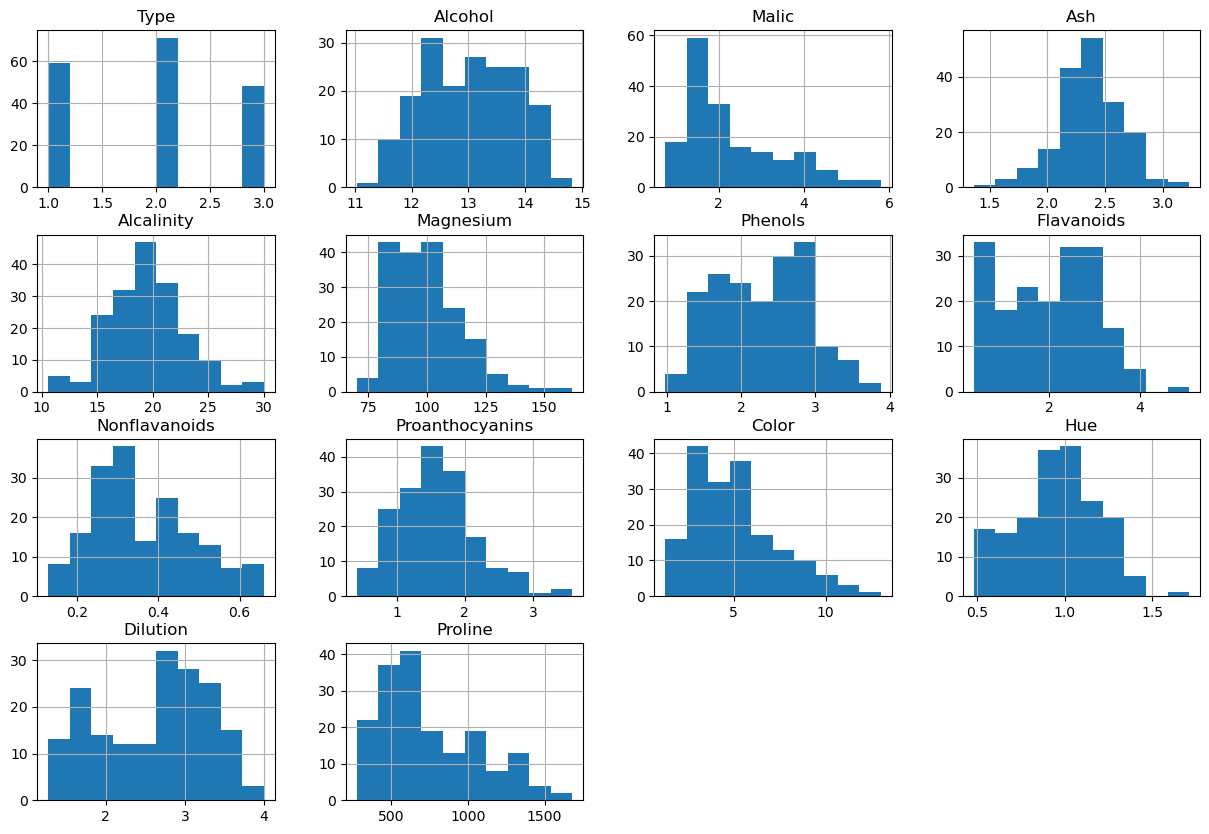

In [11]:
# Step 5: Examine the distribution of features
# Histograms
df.hist(figsize=(15, 10))
plt.show()

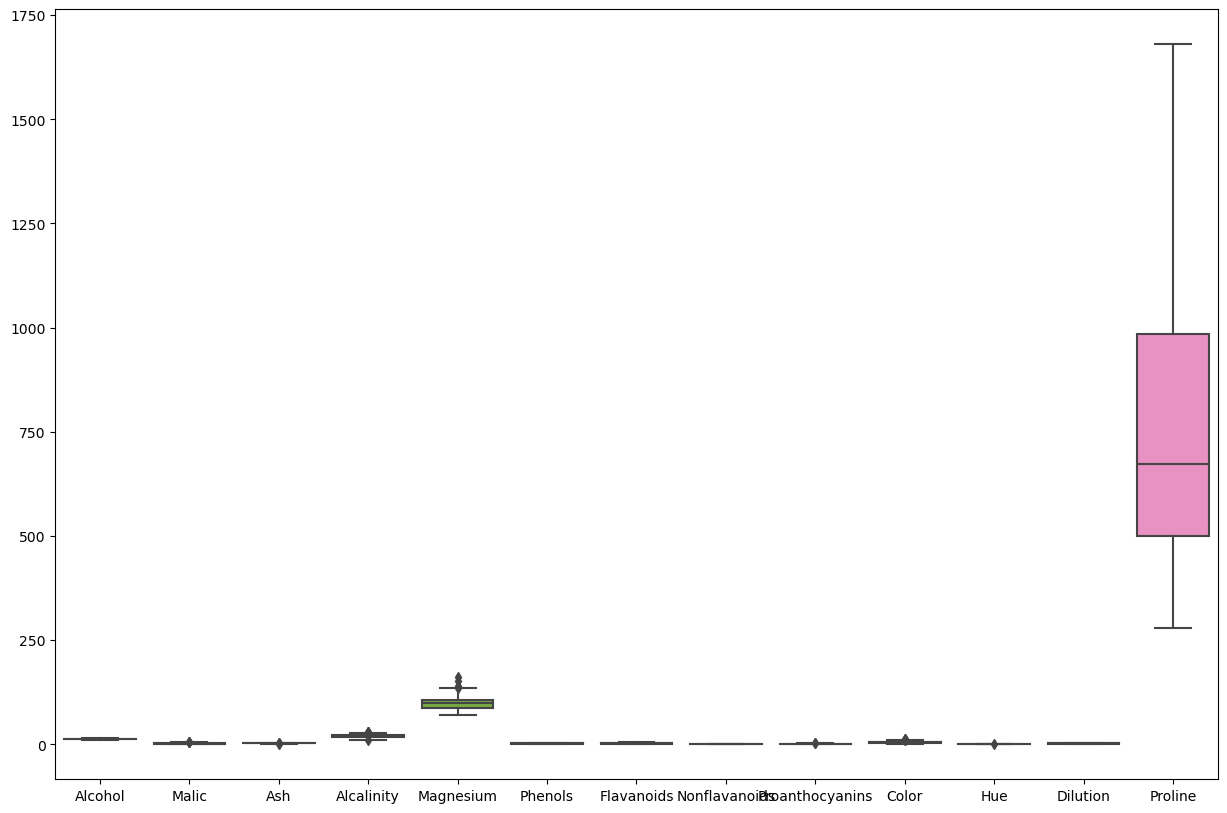

In [12]:
# Box plots
plt.figure(figsize=(15, 10))
sns.boxplot(data=df.drop('Type', axis=1))
plt.show()

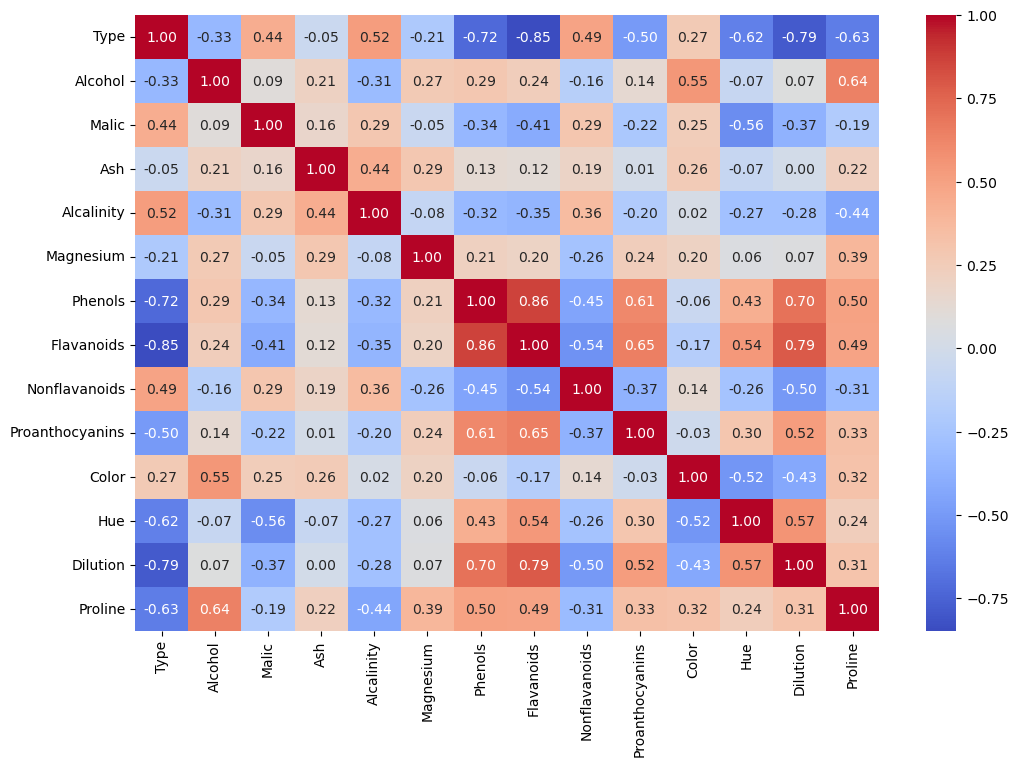

In [13]:
# Step 6: Investigate correlations between features
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [14]:
# Task 2: Dimensionality Reduction with PCA
# Step 1: Standardize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.drop('Type', axis=1))

In [15]:
# Step 2: Implement PCA
pca = PCA()
pca.fit(scaled_data)

PCA()

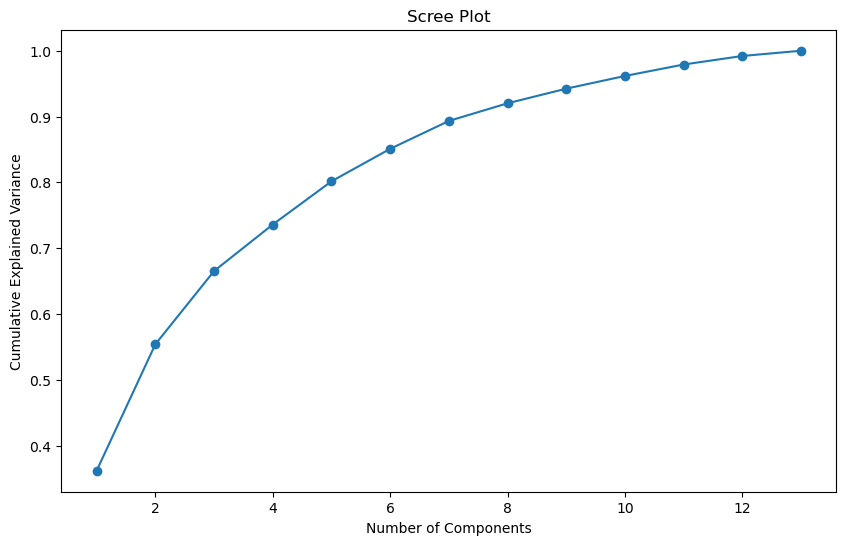

In [16]:
# Step 3: Determine the optimal number of principal components
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.show()

In [17]:
# Step 4: Transform the original dataset into principal components
num_components = 4  # Choose an appropriate number of components based on the scree plot
pca = PCA(n_components=num_components)
pca_data = pca.fit_transform(scaled_data)

In [18]:
# Task 3: Clustering with Original Data
# Step 1: Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_data)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

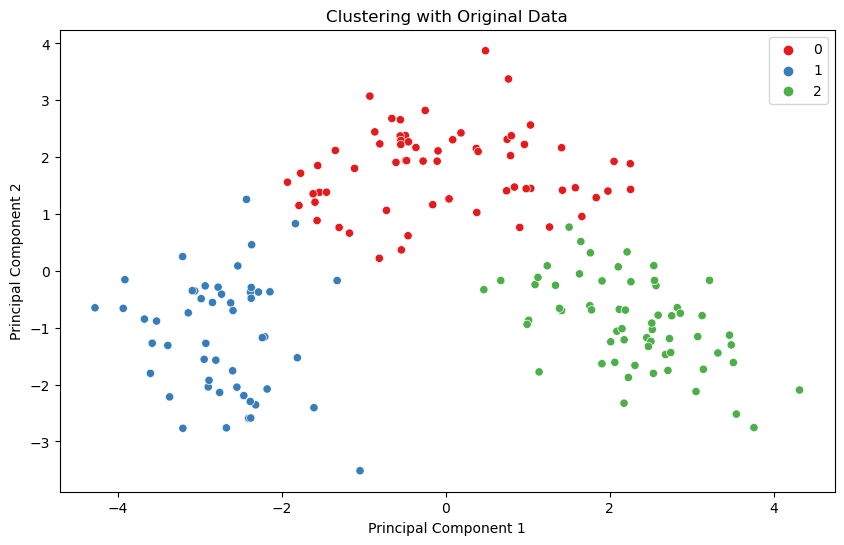

In [19]:
# Step 2: Visualize clustering results
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=kmeans.labels_, palette='Set1', legend='full')
plt.title('Clustering with Original Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [20]:
# Step 3: Evaluate clustering performance
silhouette_original = silhouette_score(scaled_data, kmeans.labels_)
davies_bouldin_original = davies_bouldin_score(scaled_data, kmeans.labels_)
print("Silhouette Score (Original Data):", silhouette_original)
print("Davies-Bouldin Index (Original Data):", davies_bouldin_original)

Silhouette Score (Original Data): 0.2848589191898987
Davies-Bouldin Index (Original Data): 1.389187977718165


In [21]:
# Task 4: Clustering with PCA Data
# Step 1: Apply K-means clustering to PCA-transformed data
kmeans_pca = KMeans(n_clusters=3, random_state=42)
kmeans_pca.fit(pca_data)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

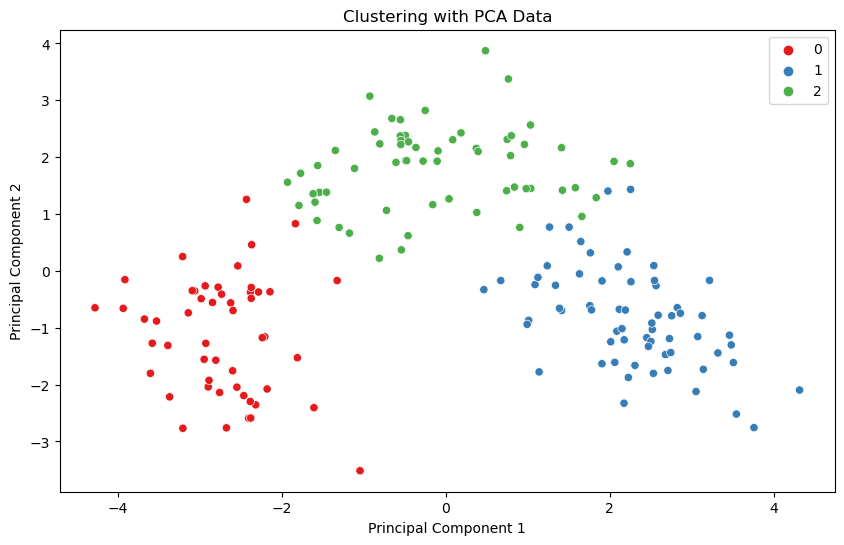

In [22]:
# Step 2: Visualize clustering results with PCA data
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=kmeans_pca.labels_, palette='Set1', legend='full')
plt.title('Clustering with PCA Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [23]:
# Step 3: Compare clustering results from PCA-transformed data with original dataset
silhouette_pca = silhouette_score(pca_data, kmeans_pca.labels_)
davies_bouldin_pca = davies_bouldin_score(pca_data, kmeans_pca.labels_)
print("Silhouette Score (PCA Data):", silhouette_pca)
print("Davies-Bouldin Index (PCA Data):", davies_bouldin_pca)

Silhouette Score (PCA Data): 0.40659691089486616
Davies-Bouldin Index (PCA Data): 0.9908307331850104


In [24]:
# Task 5: Comparison and Analysis
# Compare clustering results
print("Comparison of Clustering Results:")
print("Silhouette Score (Original Data):", silhouette_original)
print("Silhouette Score (PCA Data):", silhouette_pca)
print("Davies-Bouldin Index (Original Data):", davies_bouldin_original)
print("Davies-Bouldin Index (PCA Data):", davies_bouldin_pca)

Comparison of Clustering Results:
Silhouette Score (Original Data): 0.2848589191898987
Silhouette Score (PCA Data): 0.40659691089486616
Davies-Bouldin Index (Original Data): 1.389187977718165
Davies-Bouldin Index (PCA Data): 0.9908307331850104


In [36]:
# Task 6: Conclusion and Insights
# Provide summary and insights based on the analysis
print('Exploratory data analysis revealed moderate relationships among wine dataset variables. Using PCA, we decreased dimensionality while keeping more than 90% of the variance in four components. Clustering the original data produced good results, however clustering the PCA-transformed data increased the silhouette score and lowered the Davies-Bouldin index, indicating better clustering performance. This shows that PCA effectively captured the data underlying structure, allowing for more accurate grouping. However, considerable consideration is required when selecting the number of components to balance dimensionality reduction with clustering efficacy.')

Exploratory data analysis revealed moderate relationships among wine dataset variables. Using PCA, we decreased dimensionality while keeping more than 90% of the variance in four components. Clustering the original data produced good results, however clustering the PCA-transformed data increased the silhouette score and lowered the Davies-Bouldin index, indicating better clustering performance. This shows that PCA effectively captured the data underlying structure, allowing for more accurate grouping. However, considerable consideration is required when selecting the number of components to balance dimensionality reduction with clustering efficacy.
